In [1]:
import tensorflow
print(tensorflow.__version__)

2023-03-21 14:38:42.926088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 14:38:43.101572: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-21 14:38:43.101616: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-21 14:38:44.083150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2.11.1


In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading Data
data = pd.read_csv(r"/config/workspace/deep-learning/ANN/aps_data.csv")

data.head()

/tmp/ipykernel_1764/1931212346.py:2: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"/config/workspace/deep-learning/ANN/aps_data.csv")


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [4]:
data.shape

(5000, 171)

In [5]:
# checking for null values
print(data.isnull().sum().sum())
print(data.isna().sum().sum())

0
0


In [6]:
# replace 'na' with np.nan and look into total number of null values
data = data.replace("na",np.nan)
data.isnull().sum().sum()

71649

In [7]:
# getiing null counts in each column
pd.DataFrame(data.isnull().sum().sort_values(ascending=False)).rename(columns={0:'null_counts'})

,null_counts
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
...,...
cj_000,38
ci_000,38
bt_000,12
aa_000,0


In [8]:
# perform median imputation for every feature in data except `class` column
for feature in [feature for feature in data.columns if feature not in ['class']]:
    data[feature]=data[feature].fillna(data[feature].median())

In [9]:
# checking for null values after performing median imputation
data.isnull().sum().sum()

0

In [10]:
x = data.drop('class',axis=1)
y = data['class']

In [11]:
x.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [12]:
'''
encode the target column.

0: Negative (Damage is not caused due to fault in aps system)
1: Positive (Damage is caused due to fault in aps system)
'''
y = pd.get_dummies(y,drop_first=True)

In [14]:
# splitting data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [85]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import optimizers

# Lets Implement Classification using ANN

```
First call Sequential() object
add dense objects using add() of the sequential object

call compile function of sequential object by providing necessary info

Now we can take look at model summary

train the model
```

In [99]:
classifier = Sequential()

'''
adding both input layer and hidden layer 1 at once
we can add it seperately

units: no.of neurons in a layer
input_dim = no. of input features
'''
classifier.add(Dense(units=10, kernel_initializer='he_uniform',activation='relu',input_dim=170))

# adding hidden layer 2
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))

# adding output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [100]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [101]:
'''
no of neurons in i/p layer =170
no. of neurons in hidden layer1 = 10

(no.of i/p neurons * no.of HL neurons) + no. of biases in HL layer
(170*10)+ 10 (10 for biases) = 1710  parameters

'''
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                1710      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [102]:
trained_model = classifier.fit(x_train,y_train,batch_size=10,epochs=20,validation_split=0.25)

Epoch 1/20
263/263 [==============================] - 4s 7ms/step - loss: 0.4255 - accuracy: 0.9013 - val_loss: 0.1330 - val_accuracy: 0.9783
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 0.0998 - accuracy: 0.9790 - val_loss: 0.0803 - val_accuracy: 0.9794
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 0.0572 - accuracy: 0.9859 - val_loss: 0.0638 - val_accuracy: 0.9817
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.0620 - val_accuracy: 0.9851
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 0.0302 - accuracy: 0.9897 - val_loss: 0.0685 - val_accuracy: 0.9794
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 0.0243 - accuracy: 0.9935 - val_loss: 0.0735 - val_accuracy: 0.9806
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 

In [103]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

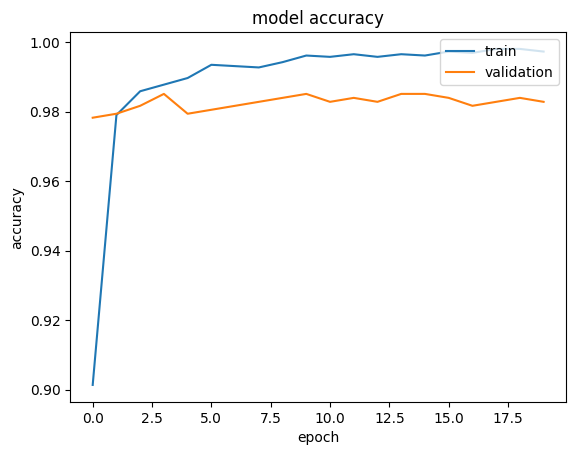

In [104]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [105]:
import time
import os
def save_model(model_dir="saved_models"):
    os.makedirs(model_dir,exist_ok=True)
    filename = time.strftime("Model_%Y_&m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir,filename)
    return model_path

In [106]:
classifier.save(save_model())

In [34]:
y_pred = classifier.predict(x_test)

y_pred = y_pred > 0.5

47/47 [==============================] - 0s 3ms/step


In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[1468,    9],
       [  10,   13]])

# Lets learn HyperParameter Tuning

In [62]:
# !pip install keras-tuner --upgrade

from kerastuner.tuners import RandomSearch

In [69]:
def build_model(hp):
  # hp is hyper parameter
  classifier = Sequential()
  classifier.add(Dense(units=32, kernel_initializer='he_uniform',activation='relu',input_dim=170))
  classifier.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
  classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

  optimizer = hp.Choice('optimizer',values=['adam','sgd','adadelta','rmsprop'])

  classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return classifier

In [70]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project',project_name='aps-fault')
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 07s]
val_accuracy: 0.7319999933242798

Best val_accuracy So Far: 0.9893333315849304
Total elapsed time: 00h 00m 24s
INFO:tensorflow:Oracle triggered exit


In [78]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [80]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [86]:
def build_model(hp):
    model = Sequential()
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 2,10)):
        model.add(
            Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    model.add(Dense(1, activation="sigmoid"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [95]:
tuner1 = RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project2',project_name='aps-fault')
tuner1.search(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.987333357334137

Best val_accuracy So Far: 0.987333357334137
Total elapsed time: 00h 01m 05s
INFO:tensorflow:Oracle triggered exit


In [96]:
tuner1.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units_0': 512,
 'activation': 'tanh',
 'units_1': 128,
 'lr': 0.0005247836867109325,
 'units_2': 416,
 'units_3': 256,
 'units_4': 32,
 'units_5': 288,
 'units_6': 128,
 'units_7': 512,
 'units_8': 64,
 'units_9': 448}

In [97]:
model1 = tuner1.get_best_models(num_models=1)[0]
model1.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.